In [9]:
#!conda install -y pymongo
import pymongo as pm
from pymongo.errors import ConnectionFailure
from time import sleep
from ssl import CERT_NONE

client = pm.MongoClient('10.210.9.130', ssl=True, ssl_cert_reqs=CERT_NONE,
                        username='strands', authSource='admin', authMechanism='SCRAM-SHA-1',
                        serverSelectionTimeoutMS=1500, password='Grum#Beere')
#client = pm.MongoClient('lcas.lincoln.ac.uk', port=80)
#try:
   # The ismaster command is cheap and does not require auth.


collection = client.LCAS2.openhab

print(collection.count())
c= collection.find({}).limit(150000)

import pandas as pd
df = pd.DataFrame(list(c))
df.value = pd.to_numeric(df.value, errors='coerce')

115213


In [10]:
import pixiedust

display(df)

_id,item,realName,timestamp,value
5899eee044ae8c632cd189d0,Kitchen_Plug_Power,Kitchen_Plug_Power,2017-02-07 15:59:28.241000,3.1
589a2fec44ae8c632cd194e4,Printer_Plug_Power,Printer_Plug_Power,2017-02-07 20:37:00.652000,747.9
5888976844ae8c632cd00812,Office1_Multi_Presence,Office1_Multi_Presence,2017-01-25 12:17:44.405000,1.0
5899d6aa44ae8c632cd185ce,Kitchen_Multi_Lux,Kitchen_Multi_Lux,2017-02-07 14:16:10.092000,128.0
5890a27944ae8c632cd0c8ef,Kitchen_Multi_Alarm,Kitchen_Multi_Alarm,2017-01-31 14:43:05.191000,0.0
5899f45e44ae8c632cd18aef,Kitchen_Plug_Power,Kitchen_Plug_Power,2017-02-07 16:22:54.418000,28.2
588f152244ae8c632cd09804,Kitchen_Multi_Alarm,Kitchen_Multi_Alarm,2017-01-30 10:27:46.124000,1.0
589b221d44ae8c632cd1a5af,Kitchen_Plug_Power,Kitchen_Plug_Power,2017-02-08 13:50:21.041000,0.5
588e5f0144ae8c632cd091a3,Office1_Multi_Presence,Office1_Multi_Presence,2017-01-29 21:30:41.407000,0.0
588b43e544ae8c632cd05124,Kitchen_Plug_Power,Kitchen_Plug_Power,2017-01-27 12:58:13.380000,0.5


In [11]:
print(df.columns)
print(df.describe(include='all'))

#from scipy import stats

#cont = pd.crosstab(df.item, df.realName)

print(df.item.value_counts())


Index(['_id', 'item', 'realName', 'timestamp', 'value'], dtype='object')
                             _id                item            realName  \
count                     115213              115213              115213   
unique                    115213                  41                  41   
top     588e417444ae8c632cd08e24  Kitchen_Plug_Power  Kitchen_Plug_Power   
freq                           1               37048               37048   
first                        NaN                 NaN                 NaN   
last                         NaN                 NaN                 NaN   
mean                         NaN                 NaN                 NaN   
std                          NaN                 NaN                 NaN   
min                          NaN                 NaN                 NaN   
25%                          NaN                 NaN                 NaN   
50%                          NaN                 NaN                 NaN   
75%            

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


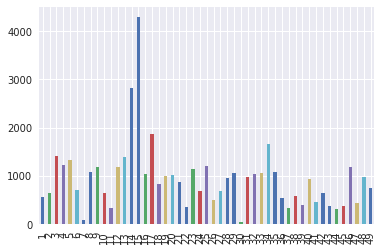

In [45]:
%matplotlib inline
import numpy as np
from numpy.fft import rfft, irfft
from numpy import abs, sum, square, sqrt
from pandas import Series
#subdf = df[df.item == 'Kitchen_Multi_Lux'].copy()
subdf = df[df.item == 'Kitchen_Multi_Lux'].reset_index(drop=True)
v = subdf.value
#display(df[df.item == 'Kitchen_Multi_Lux'])
#v.plot()
spectrum = Series(rfft(v))
subdf['fft'] = spectrum
abs(spectrum[1:50]).plot(kind='bar')


In [ ]:
filtered = spectrum.copy()
filtered[1:] = 0
filtered[14] = spectrum[14]
filtered[15] = spectrum[15]
filtered[17] = spectrum[17]
reconstruct = Series(abs(irfft(filtered)))
subdf['reconstruction'] = reconstruct
diff = v.values - reconstruct.values
subdf['diff'] = diff
error = sqrt(sum(square(diff)))/reconstruct.count()
print('reconstruction error: %f' % error)
reconstruct.plot()
#display(reconstruct.to_frame())
display(subdf)